# initialize packages, make some installations if needed 
In the following cells make sure to add your own comments as we go through them in class

In [8]:
#this is my working directory, all files and paths are relative to this
# you might need a leading "!" character to pass bash commands to bash terminal
!pwd

/home/gevas/Projects/LAB_master_2024/EKPA.astro.2024/D1


In [9]:
pwd

'/home/gevas/Projects/LAB_master_2024/EKPA.astro.2024/D1'

In [5]:
#import pachages
import os
import subprocess
import sys
import heasoftpy as hsp


from astropy.io import fits
import astropy.io.fits as pyfits
from astropy.visualization import simple_norm
import matplotlib as mpl
# from regions import CirclePixelRegion
from astropy.coordinates import SkyCoord
import astropy.units as u
# import re

from astropy.wcs import WCS
#from reproject import reproject_interp
import scipy.stats
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import scipy.optimize
#from stingray.pulse.search import epoch_folding_search, z_n_search
#from stingray.pulse.pulsar import fold_events
#from stingray.pulse.search import plot_profile

%matplotlib inline

# We can access the online data

comments here load data

# file names

#### events in swift data
These are tables with information of each event/detection, i.e. think of them as scatter plots

***xpcw3po_uf.evt.gz -> unfiltered data

***xpcw3po_cl.evt.gz -> clean event file for "pc" imaging data

***xwtw2sl_cl.evt.gz -> clean event file for "wt" 1D projected data

#### images in swift XRT products
***ex.img.gz -> exposure map

***sk.img.gz -> sky image... 2D image/histogram of events. 

In [14]:
#experiment with commands to find path for diectory with clean "cl.evt" or unfiltered events "uf.evt" 
# remember some files are ziped some no, so make sure file exists and has proper name
!ls 00032075003/xrt/
!echo "-----------"
!ls 00032075003/xrt/event/
!echo "-----------"
!ls 00032075003/xrt/products/


event  hk  products
-----------
sw00032075003xpcw3po_cl.evt.gz	sw00032075003xwtw2sl_ufre.evt.gz
sw00032075003xpcw3po_uf.evt.gz	sw00032075003xwtw2st_cl.evt.gz
sw00032075003xwtw2sl_cl.evt.gz	sw00032075003xwtw2st_uf.evt.gz
sw00032075003xwtw2sl_uf.evt.gz	sw00032075003xwtw2st_ufre.evt.gz
-----------
sw00032075003xpc_ex.img.gz  sw00032075003xpc_sk.img.gz	sw00032075003x_skim.gif


In [16]:
# this is the name of the observation "obsid"
obsid = '00032075003'
#usefull paths that you might need for "event" or products
path  = '00032075003/'
path2  = '00032075003/xrt/event/' 
path3  = '00032075003/xrt/products/' 

#these informations are needed for data reduction. i.e. to create clean events from unfiltered data.
# stem   = 'sw' + obsid
# indir  = path
# outdir = './products/' + obsid + '_p/event_cl'

# # No need to run again...also clobber=yes will over write all files
# # # dir(hsp.xrtpipeline)
# out = hsp.xrtpipeline(indir=indir, outdir=outdir, steminputs=stem, 
#                     clobber='yes', noprompt=True, verbose=True)



We read an image file either ex/sk file to read header information to go from pixel values to RA/DEC
read the appropriate file, and make sure path works

In [18]:
image_file =path3+'sw00032075003xpc_ex.img.gz'
hdul = fits.open(image_file)

data = hdul[0].data
header = hdul[0].header

# Create a new WCS object from scratch
# convert pixel coordinates to sky coors, using processed image
wcs = WCS(naxis=2)
wcs.wcs.crpix = [header['CRPIX1'], header['CRPIX2']]
wcs.wcs.cdelt = [header['CDELT1'], header['CDELT2']]
wcs.wcs.crval = [header['CRVAL1'], header['CRVAL2']]
wcs.wcs.ctype = [header['CTYPE1'], header['CTYPE2']]


We read an event file either "clean" file to plot scatter plot of events.
read the appropriate file, and make sure path works

In [23]:
# event_file = outdir+'/sw00032075003xpcw3po_cl.evt'
event_file = path2 +'sw00032075003xpcw3po_cl.evt.gz'
# event_file = path12+'/sw00032075003xpcw3po_cl.evt'
imfits = pyfits.open(event_file)


im = imfits[1].data

print(im.dtype)

(numpy.record, [('TIME', '>f8'), ('X', '>i2'), ('Y', '>i2'), ('RAWX', '>i2'), ('RAWY', '>i2'), ('DETX', '>i2'), ('DETY', '>i2'), ('PHA', '>i4'), ('PI', '>i4'), ('GRADE', '>i2'), ('STATUS', 'u1', (2,))])


PI column is the reconstracted energy in units of 100eV , so PI of 10 is 1 keV 

In [28]:
energy = im['PI']/100
print (energy)

[5.85 2.06 0.71 ... 0.59 2.37 1.04]


Plot X/Y values i.e. scatter plot in pixel coordinates

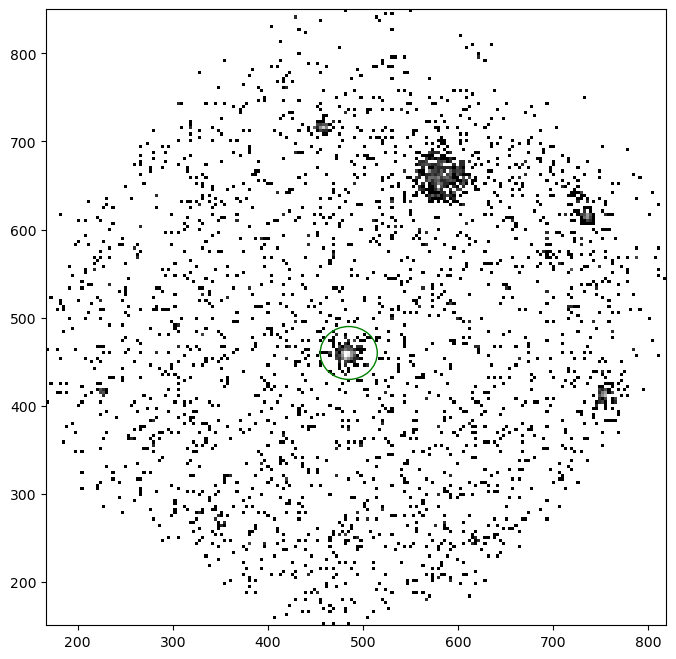

In [29]:

x = im['X']
y = im['Y']

plt.close('all')
fig1=plt.figure(1,figsize=(8,8))
plt.hist2d(x, y, bins=(200, 200),cmap=mpl.cm.gray,norm=mpl.colors.LogNorm())
circle=plt.Circle((485,460),30,color='g', fill=False)
plt.gca().add_patch(circle)

plt.show()

Plot X/Y values i.e. scatter plot in RA/DEC coordinates

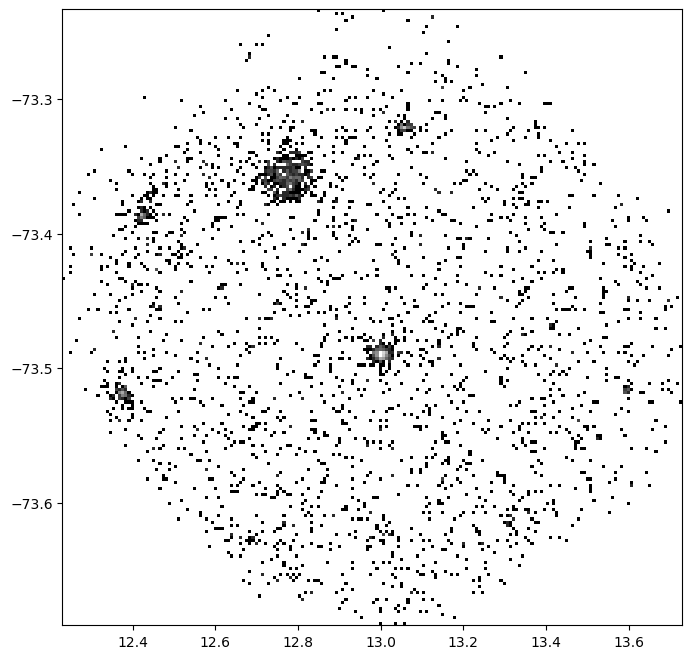

In [30]:
plt.close('all')
fig1=plt.figure(1,figsize=(8,8))
ra, dec = wcs.all_pix2world(x, y, 0)
plt.hist2d(ra, dec, bins=(200, 200),cmap=mpl.cm.gray,norm=mpl.colors.LogNorm())
plt.plot(x,y,'r.')
plt.show()

We  can create a 2D histogram and zoom in around sources

In [31]:
H,Xedges,Yedges = np.histogram2d(x, y, bins=200, range=None, density=None, weights=None)
Y, X = np.meshgrid(Xedges[0:-1], Yedges[0:-1])
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.plot_surface(X, Y, H, vmin=H.min() * 10, cmap=mpl.cm.Blues)

(600.0, 750.0)

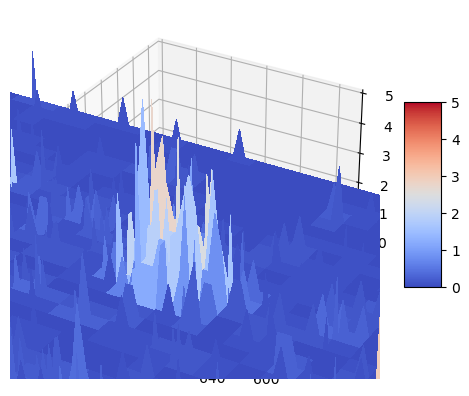

In [32]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.plot_surface(X, Y, H, vmin=H.min() * 2,vmax=10, cmap=mpl.cm.Blues)
surf = ax.plot_surface(X, Y, H, vmin=0,vmax=5, cmap=mpl.cm.coolwarm,linewidth=10,antialiased=False)
ax.set_zlim([0,5])

fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.set_xlim([400,550])
# ax.set_ylim([400,550])

ax.set_xlim([540,650])
ax.set_ylim([600,750])

# Lets do source detection

We need an event file or an image!!! either will do

sw00032075003xpcw3po_cl.evt.gz

sw00032075003xpc_sk.img.gz

We prefer an image however if you use an event /fits file you need to define the size of the file... see commented line below.

f'read/fits/size=1024 {image_file}

The commands below create a file "ximage_cmds.xco" with commands that runs through bash in the bachground, so we use python as a "wrapper" for bash and HEASoft with the use of os.system command

In [33]:
# image_file = outdir+'/sw00032075003xpcw3po_cl.img'
# image_file = path2 +'sw00032075003xpcw3po_cl.evt.gz'
image_file = path3+'/sw00032075003xpc_sk.img.gz'
# output_file = 

def run_ximage(image_file):
    # Define the ximage commands
    ximage_cmds = [
        f'read {image_file}',
        # f'read/fits/size=1024 {image_file}',
        'background',
        'detect/snr=3',
        'exit'
    ]
    
    # Save the commands to a file
    with open('ximage_cmds.xco', 'w') as f:
        f.write('\n'.join(ximage_cmds))
        
    # Run ximage with the saved commands
    os.system(f'ximage < ximage_cmds.xco')
    
run_ximage(image_file)

******************************************************************************
*                              Welcome to XIMAGE                             *
******************************************************************************

                                                          Type "help" for help


                                           VERSION 4.5.1  17:20:16 18-Apr-2024

 No of detectors read in:   34
[XIMAGE> read 00032075003/xrt/products//sw00032075003xpc_sk.img.gz
 Telescope SWIFT XRT
 Image size = 1000 x 1000 pixels
 Image rebin = 1.000
 Image center = 500.5, 500.5
 Reading an image
  Image level, min = 0.0000000 max = 19.000000
 Copied MAP1 to MAP9
[XIMAGE> background
 Calculating background: Poisson statistics assumed
 Background box size =  64
 Background =6.9818E-03 cts/original-pixel
            =6.9818E-03 cts/image-pixel
            =4.3104E-04 cts/sqarcmin/s
            =6.6534E-07 cts/original-pixel/s
[XIMAGE> detect/snr=3
 Calculating background: 

The code above outputs a detection file with all stored information, source possition, intensity and other "***_sk.det".

We will read the file and convert columns to arrays in python, so they are easier to use

In [34]:
detection_file = 'sw00032075003xpc_sk.det'

RA_det = []
DEC_det = []
X_det = []
Y_det = []

with open(detection_file, "r") as f:
    for line in f:
        # ignore lines starting with "!"
        if line.startswith("!"):
            continue
        
        # extract the value before "+/-"
        line_parts = line.split()
        
        # get the value before "+/-"
        value = float(line_parts[1].split("+/-")[0])

        # get the RA values
        ra_parts = line_parts[5:8]
        ra_h, ra_m, ra_s = map(float, ra_parts)
        
        dec_parts = line_parts[8:11]
        dec_h, dec_m, dec_s = map(float, dec_parts)

        # compute RA in J2000
        ra_j2000 = (ra_h + ra_m/60.0 + ra_s/3600.0) * 15.0
        dec_j2000 = np.sign(float(dec_h)) * (abs(float(dec_h)) + float(dec_m)/60 + float(dec_s)/3600)
        
        RA_det.append(ra_j2000)
        DEC_det.append(dec_j2000)
        X_det.append(float(line_parts[2]))
        Y_det.append(float(line_parts[3]))
        
        print(value, ra_j2000, dec_j2000)
        # print(value) 
        # print(ra_h, ra_m, ra_s, ra_j2000)
        # print(dec_h, dec_m, dec_s,dec_j2000)

0.0493 13.002979166666666 -73.49033361111111
0.00282 12.8209125 -73.36697083333333
0.00326 12.744054166666668 -73.3694686111111
0.0171 12.784791666666667 -73.35792472222222
0.00817 12.741737500000001 -73.35619277777778
0.0058 12.774458333333333 -73.349125
0.00236 12.794095833333333 -73.34163138888889
0.0113 13.059145833333334 -73.3217436111111
0.00894 12.425116666666666 -73.38699972222223
0.0131 12.379383333333333 -73.51936333333333
0.00261 13.596595833333334 -73.51714388888888


Lets plot the detected sources together with an event file, you may play with X/Y over RA/DEC
Can you spot differences when working with different snr (signall to noise) for detection

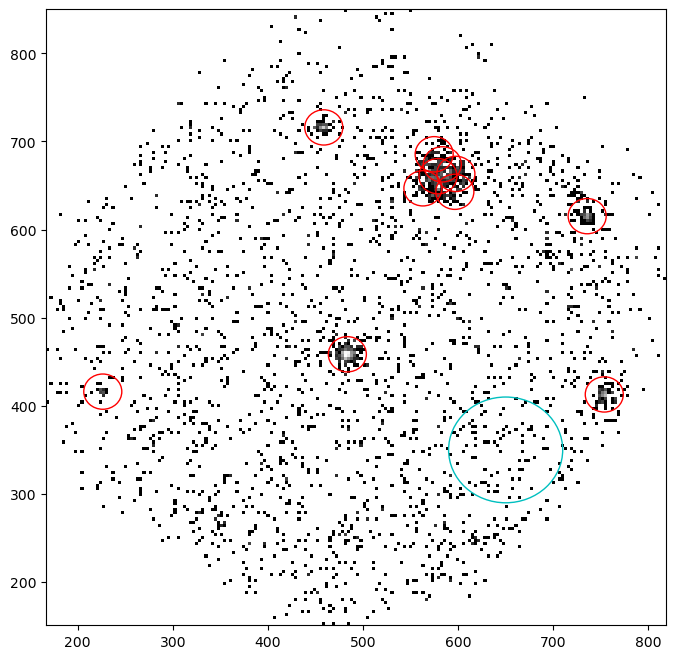

In [36]:
event_file = path2+'/sw00032075003xpcw3po_cl.evt.gz'


imfits = pyfits.open(event_file)

im = imfits[1].data

x = im['X']
y = im['Y']

ra, dec = wcs.all_pix2world(x, y, 0)

plt.close('all')
fig1=plt.figure(1,figsize=(8,8))

plt.hist2d(x, y, bins=(200, 200),cmap=mpl.cm.gray,norm=mpl.colors.LogNorm())
for i in range(len(X_det)):
    circle=plt.Circle((X_det[i],Y_det[i]),20,color='r', fill=False)
    plt.gca().add_patch(circle)

#random BG region    
circle=plt.Circle((650,350),60,color='c', fill=False)
plt.gca().add_patch(circle)

# plt.hist2d(ra, dec, bins=(200, 200),cmap=mpl.cm.gray,norm=mpl.colors.LogNorm())
# for i in range(len(RA_det)):
#     circle=plt.Circle((RA_det[i],DEC_det[i]),0.01,color='r', fill=True)
#     plt.gca().add_patch(circle)
    
plt.show()